In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_final=pd.read_csv('df_final.csv')

Understand the dataset

In [4]:
# Display the first few rows of the dataset
print(df_final.head())

# Check the shape of the dataset
print("Shape of the dataset:", df_final.shape)

# Check column names and data types
print(df_final.info())

# Check for missing values
print(df_final.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df_final.duplicated().sum())

   customer_id  total_orders  days_since_last_order  average_order_value  \
0            2             1                   1041                4.360   
1            4             1                    393               26.760   
2            5             2                    760              260.640   
3            6             4                    397              134.824   
4            7             1                    544              125.360   

   completed_orders  canceled_orders  address_status_changed  \
0                 0                0                   False   
1                 1                0                   False   
2                 6                0                    True   
3                 8                0                   False   
4                 2                0                   False   

  shipping_method_preference  churn  
0              International      1  
1              International      1  
2                    Express      1  
3     

# Univariate anaysis

Numerical Features

       customer_id  total_orders  days_since_last_order  average_order_value  \
count  1686.000000   1686.000000            1686.000000          1686.000000   
mean    987.169039      4.475682             316.330961           126.919006   
std     575.072407      3.550609             292.148500            84.891251   
min       2.000000      1.000000              11.000000             1.120000   
25%     488.250000      1.000000              80.000000            65.688572   
50%     983.500000      4.000000             203.000000           105.863220   
75%    1488.750000      7.000000             483.000000           171.304857   
max    2000.000000     24.000000            1099.000000           485.400020   

       completed_orders  canceled_orders        churn  
count       1686.000000      1686.000000  1686.000000  
mean           8.788256         0.739027     0.730130  
std           12.024392         2.157476     0.444024  
min            0.000000         0.000000     0.000000  

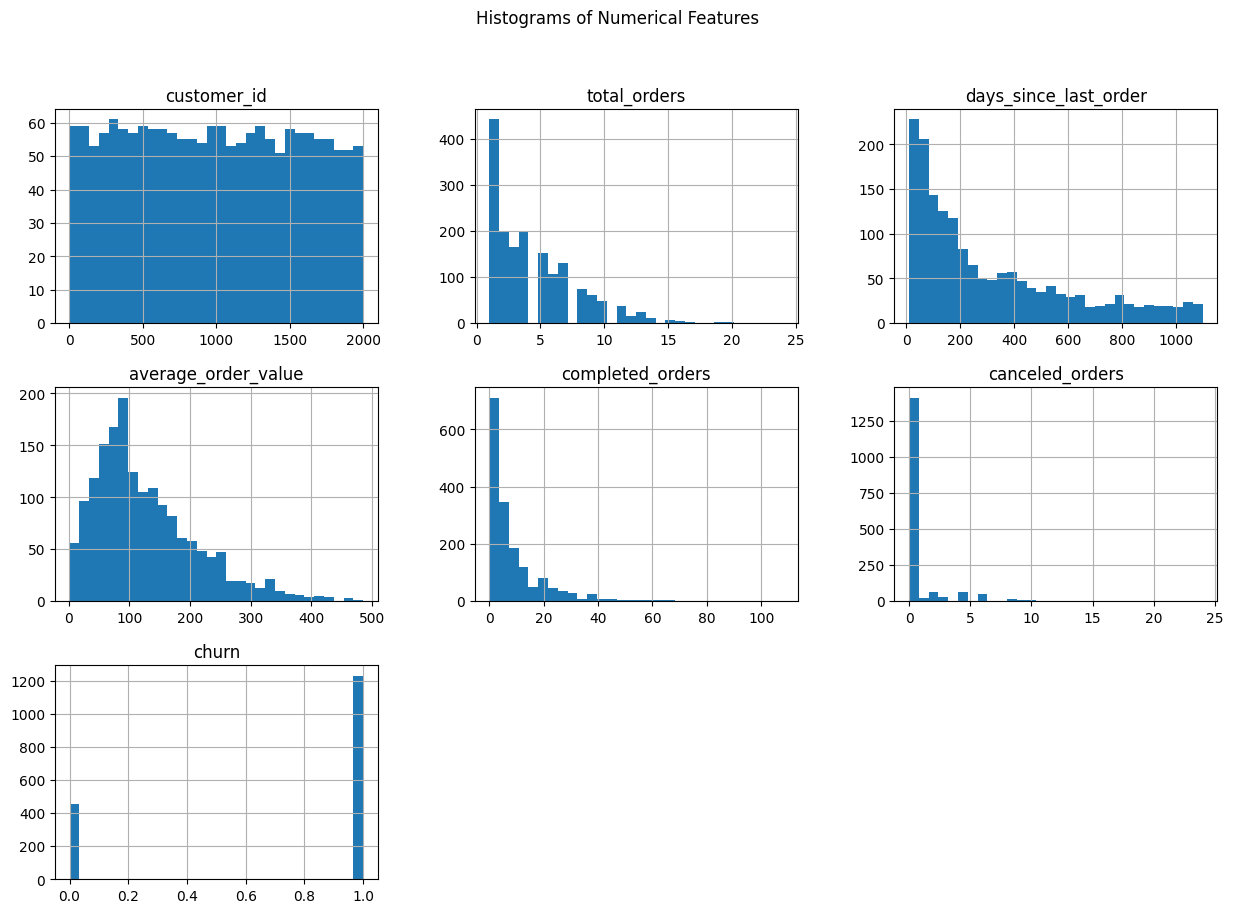

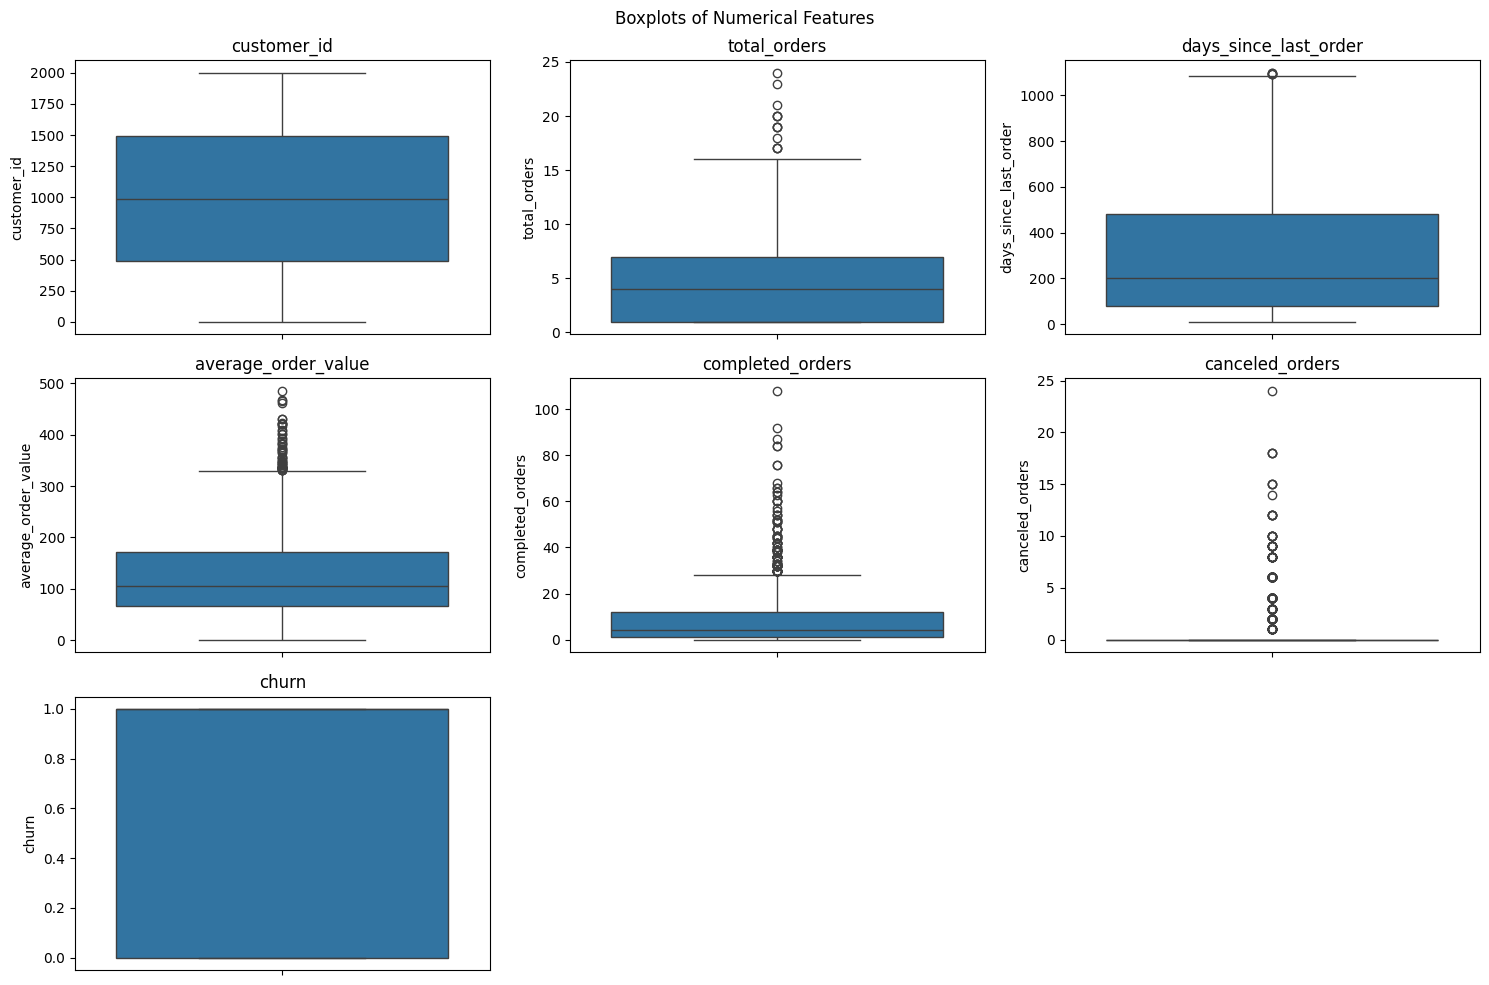

In [5]:
# Summary statistics for numerical features
print(df_final.describe())

# Plot histograms for numerical features
df_final.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Plot boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_final.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_final[column])
    plt.title(column)
plt.suptitle("Boxplots of Numerical Features")
plt.tight_layout()
plt.show()

Key Takeaways

Customer Behavior:

Most customers are occasional buyers with a low number of total and completed orders.

A small segment of customers are frequent buyers with high total orders and completed orders.

Churn Indicators:

Customers with a high days_since_last_order (e.g., >200 days) are likely churned.

Customers with low average_order_value or high canceled_orders might also be at risk of churn.

Revenue Insights:

The majority of customers have moderate spending habits, with a few high-spending outliers.

Actionable Insights:

Retention Strategies: Focus on customers with high days_since_last_order to prevent churn.

Upselling Opportunities: Target customers with high total_orders and average_order_value for upselling.

Order Fulfillment: Investigate reasons for canceled orders to improve customer satisfaction.



Categorical Features

shipping_method_preference
International    466
Express          439
Priority         395
Standard         386
Name: count, dtype: int64


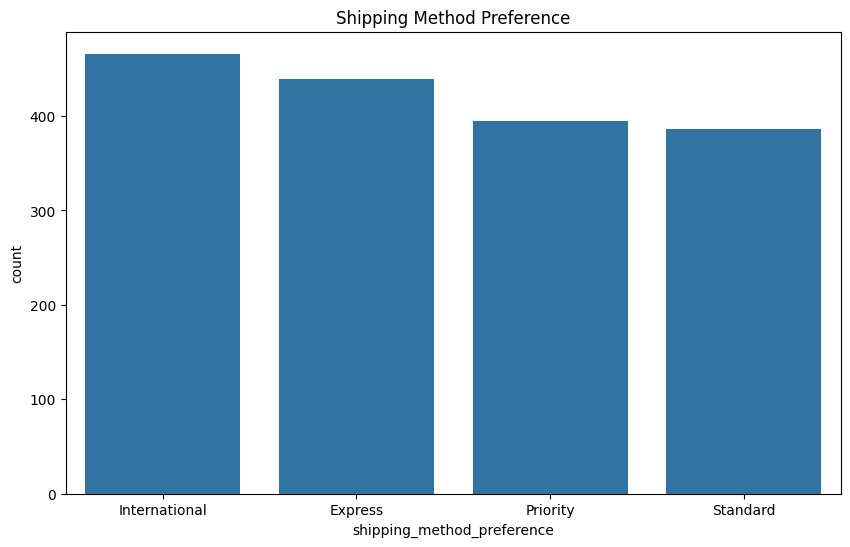

In [6]:
# Frequency table for categorical features
print(df_final['shipping_method_preference'].value_counts())

# Plot bar plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='shipping_method_preference')
plt.title("Shipping Method Preference")
plt.show()

# Bivariate analysis

Numerical Features vs Churn

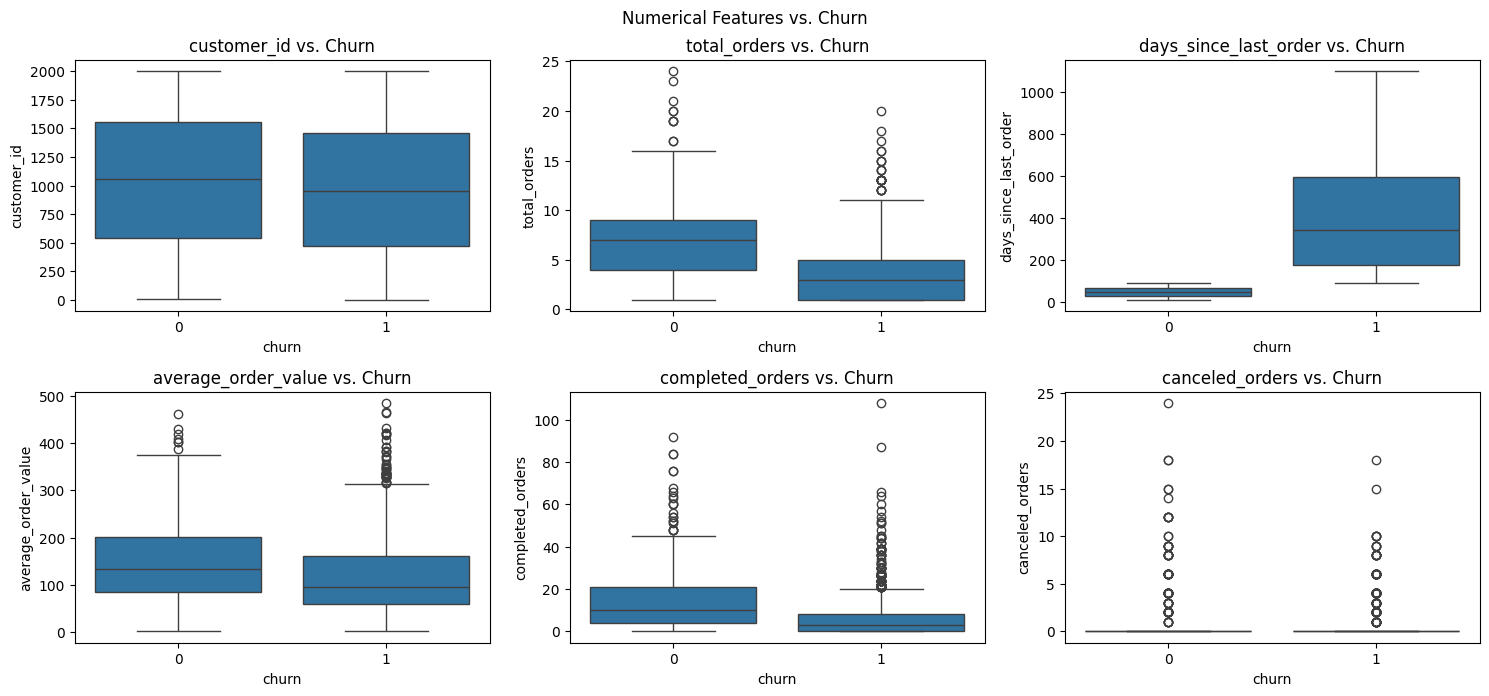

In [7]:
# Boxplots for numerical features vs. churn
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_final.select_dtypes(include=['int64', 'float64']).columns):
    if column != 'churn':
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='churn', y=column, data=df_final)
        plt.title(f"{column} vs. Churn")
plt.suptitle("Numerical Features vs. Churn")
plt.tight_layout()
plt.show()

Key Takeaways


Higher total orders and completed orders reduce the likelihood of churn.

Long inactivity (high days since last order) is a strong churn signal.

Order value alone does not strongly differentiate churned vs. non-churned customers.

Cancellation rates do not appear to have a direct impact on churn.

 Categorical Features vs. Churn

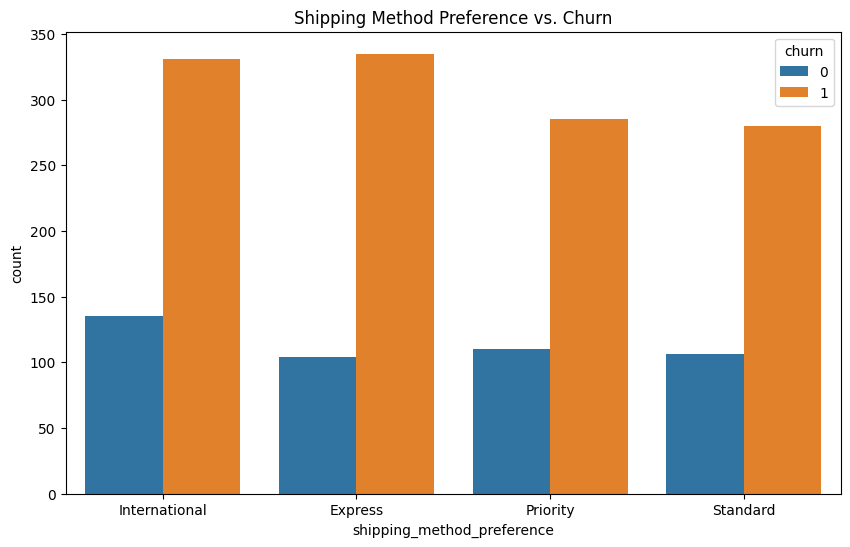

In [8]:
# Bar plots for categorical features vs. churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='shipping_method_preference', hue='churn')
plt.title("Shipping Method Preference vs. Churn")
plt.show()

Corelation Analysis

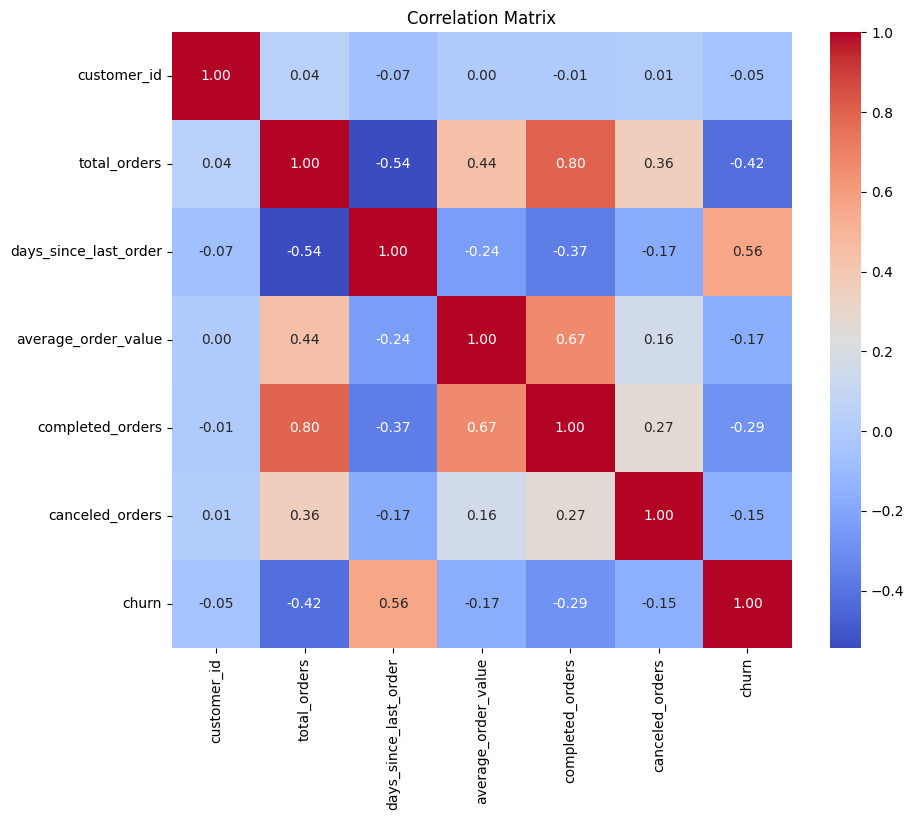

In [9]:
# Correlation matrix
df_numerical=df_final.select_dtypes(include=['int64', 'float64'])
corr_matrix=df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Strong Correlation Between Completed Orders and Total Orders (+0.80)
This suggests that most orders placed are successfully completed, meaning order fulfillment is efficient.

Negative Correlation Between Total Orders and Churn (-0.42)
Customers with a higher number of total orders are less likely to churn. This indicates that repeat customers are more engaged and loyal.

Positive Correlation Between Days Since Last Order and Churn (+0.56)
Customers who haven’t ordered in a long time are more likely to churn. This aligns with the expectation that inactivity leads to churn.

Negative Correlation Between Completed Orders and Churn (-0.29)
More completed orders are linked to lower churn, reinforcing that active buyers tend to stay.

Weak Negative Correlation Between Average Order Value and Churn (-0.17)
Customers who spend more per order are slightly less likely to churn, but the relationship isn’t strong.

Low Correlation Between Canceled Orders and Churn (-0.15)

This suggests that cancellations alone don’t strongly predict churn.

# Time-Based Analysis

Order Date Analysis

In [10]:
df_orders=pd.read_csv('df_orders.csv')

C:\Users\nkn05\AppData\Local\Temp\ipykernel_32224\1492648706.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_orders.set_index('order_date').resample('M')['order_id'].count().plot(figsize=(12, 6))


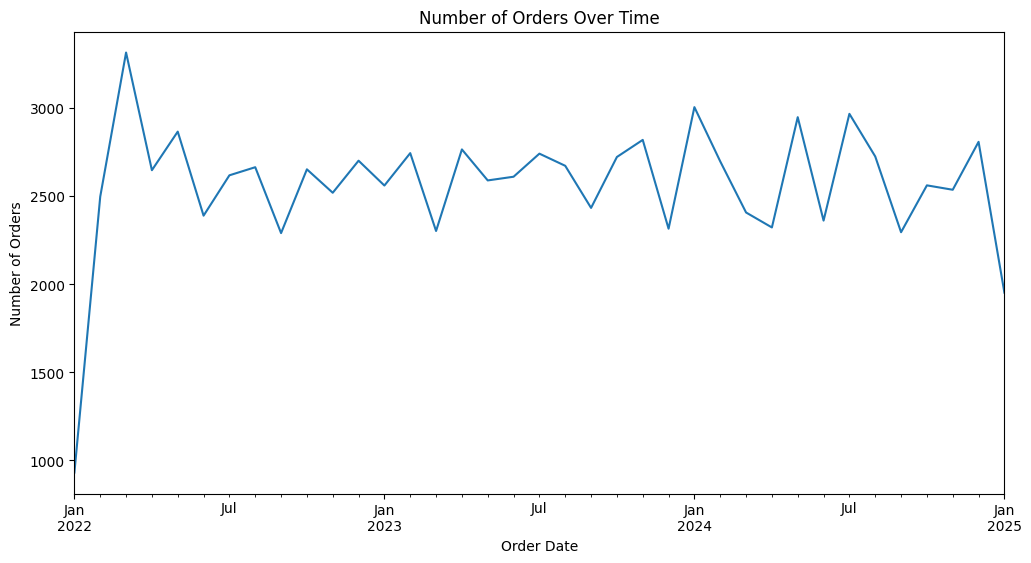

In [11]:
# Convert order_date to datetime (if not already done)
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Plot number of orders over time
df_orders.set_index('order_date').resample('M')['order_id'].count().plot(figsize=(12, 6))
plt.title("Number of Orders Over Time")
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.show()

churn over time

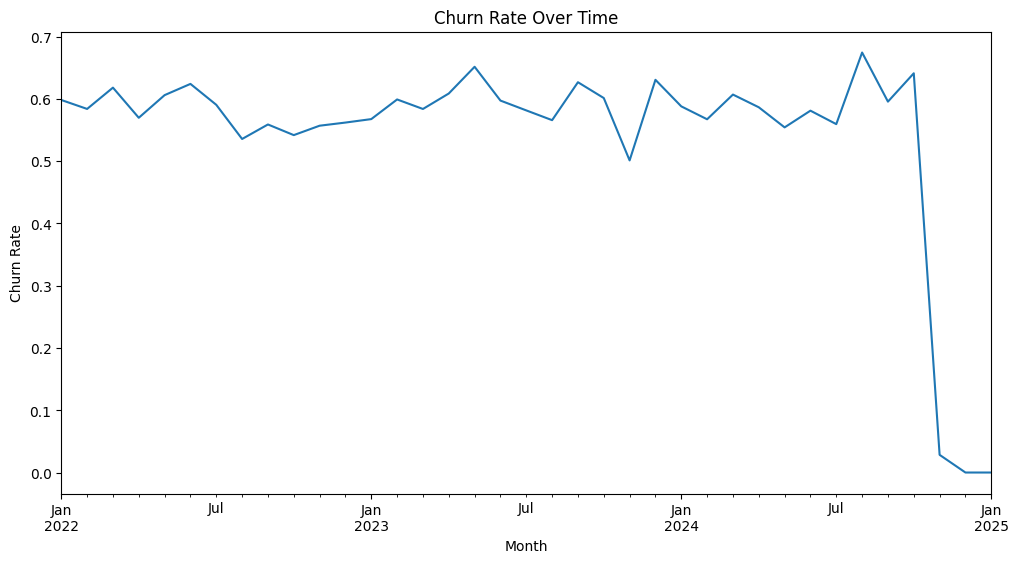

In [12]:
# Calculate churn rate over time
df_orders['month'] = df_orders['order_date'].dt.to_period('M')
churn_rate_over_time = df_orders.groupby('month')['churn'].mean()

# Plot churn rate over time
churn_rate_over_time.plot(figsize=(12, 6))
plt.title("Churn Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Churn Rate")
plt.show()

# OVERALL INSIGHTS

Order Activity: The strongest indicators of churn are related to order activity:

Low Total Orders: Customers with fewer total orders are significantly more likely to churn.

Low Completed Orders: Similarly, fewer completed orders strongly correlate with higher churn.

Long Time Since Last Order: The longer it has been since a customer placed an order, the much higher the probability of churn.

Shipping Preference (Potentially): While not as strong as order activity, shipping preference appears to play a role

Standard Shipping: Customers using standard shipping show the highest count of churn, suggesting potential issues with this shipping method.

Express/Priority Shipping: While having lower counts, these methods show a proportionally higher percentage of churn, implying that customers who pay more for faster shipping might have higher expectations and churn if those aren't met.

Canceled Orders (Weakly): There's a slight tendency for churned customers to have more canceled orders, indicating possible dissatisfaction or problems with the service.

Other Observations:

Customer ID: customer_id is not a useful predictor of churn.
Average Order Value: While there's a slight tendency for customers with lower average order values to churn, it's not a strong indicator on its own.
Order Trends Over Time: There's a general upward trend in the number of orders, with some seasonality (peaks and troughs). This suggests growth potential but also the need to manage seasonal fluctuations.
Churn Rate Over Time (Potentially Anomalous): The churn rate was relatively stable until a sudden, drastic drop in January 2025. This drop is highly suspicious and likely due to a data error, requiring immediate investigation.

In [15]:
df_final.info()
print(df_final.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 1686 non-null   int64  
 1   total_orders                1686 non-null   int64  
 2   days_since_last_order       1686 non-null   int64  
 3   average_order_value         1686 non-null   float64
 4   completed_orders            1686 non-null   int64  
 5   canceled_orders             1686 non-null   int64  
 6   address_status_changed      1686 non-null   bool   
 7   shipping_method_preference  1686 non-null   object 
 8   churn                       1686 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(1)
memory usage: 107.1+ KB
       customer_id  total_orders  days_since_last_order  average_order_value  \
count  1686.000000   1686.000000            1686.000000          1686.000000   
mean    987.169039      4.475682  